# Projet Analyse donnees de these:

Analyse et exploration des donnees des centrales de production electriques du senegal

## Importation des packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl
import seaborn as sns

In [8]:
import os

fichier_excel = r"Rapports2019\01janvier2019\01012019Ma.xlsx"
if not os.path.exists(fichier_excel):
    print("Le fichier n'existe pas à cet emplacement.")
else:
    print('super')



Le fichier n'existe pas à cet emplacement.


## Chargement des donnees 

In [9]:
fichier_excel = r"A:\Mes_Documents_de_these\DOCUMENTS_RECHERCHE\DOCUMENTS_DE_REPPORTS\Datasets_theses\Rapports2019\01janvier2019\01012019Ma.xlsx" # le chemain du fichier 
donnees = pd.read_excel(fichier_excel,sheet_name=None) # lecture du fichier avec tous les feuilles selon (sheet_name= None)

In [10]:
print("feuilles disponible")
print(donnees.keys()) # la liste des feuilles  contenues dans ce classeur excel

feuilles disponible
dict_keys(['Rapport', 'Centrales', 'Demande', 'Délestage', 'P Inst', 'Energie', 'Pdel', 'Pdispo', 'Clients HT', 'liens', 'Reseau', 'Feuil1'])


### Extraction des donnees de les centrales

In [11]:
# afficher du feuille centrales avec la suppression de l'entete
centrales = pd.read_excel(fichier_excel, skiprows=2,sheet_name='Centrales')
# suppression des variables non pertinantes afin de rendre propre la feuille
centrales=centrales[:26].drop(['Unnamed: 26', 'Unnamed: 27','Total PV'],axis=1)
centrales.tail()

,Heure,C6,C7,kah 1,Manantali,GTI,Somelec,Kounoune,Agg edm,APR,...,C4,C5,Tobene Power,PV Bokhol,PV Sakal,PV Mbour,PV Merina Mekhé,PV Santhiou Mekhé,PV Kahone,PV DIASS
21,20 h 30,82.7,83.1,0,79.609528,0,0,20.9,0.0,0.0,...,30.0,0.0,55.2,0.0,0.0,0.699520,0.0,0.0,0.0,0.0
22,21 h,91.5,83.1,0,71.144581,0,0,28.3,0.0,0.0,...,30.0,0.0,36.1,0.0,0.0,0.704080,0.0,0.0,0.0,0.0
23,21 h 30,92.2,82.9,0,71.417466,0,0,28.7,0.0,0.0,...,30.0,0.0,54.0,0.0,0.0,0.569923,0.0,0.0,0.0,0.0
24,22 h,92.2,89.6,0,69.254066,0,0,28.8,0.0,0.0,...,30.0,0.0,54.9,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
25,23 h,82.5,78.2,0,51.121961,0,0,28.8,0.0,6.1,...,30.0,NaN,58.4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [12]:
centrales.columns.shape

(25,)

### Extraction des donnees de les Demande energetique

In [13]:
# afficher du feuille centrales avec la suppression de l'entete
# , skiprows=2
Demande = pd.read_excel(fichier_excel,skiprows=2,sheet_name='Centrales')
# suppression des variables non pertinante afin de rendre propre la feuille
Demande=Demande[:26].drop(['Unnamed: 26', 'Unnamed: 27','Total PV'],axis=1)
Demande.head()

,Heure,C6,C7,kah 1,Manantali,GTI,Somelec,Kounoune,Agg edm,APR,...,C4,C5,Tobene Power,PV Bokhol,PV Sakal,PV Mbour,PV Merina Mekhé,PV Santhiou Mekhé,PV Kahone,PV DIASS
0,1 h,82.3,78.2,0,9.365707,0,0,29.8,0.0,106.9,...,29.1,0.0,17.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2 h,83.2,78.2,0,19.677563,0,0,29.8,0.0,75.2,...,29.2,0.0,17.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3 h,82.2,77.8,0,17.521857,0,0,29.8,0.0,73.9,...,29.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4 h,68.4,62.3,0,0.000000,0,0,29.8,0.0,77.2,...,29.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5 h,68.3,52.2,0,24.902888,0,0,29.8,0.0,75.1,...,29.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

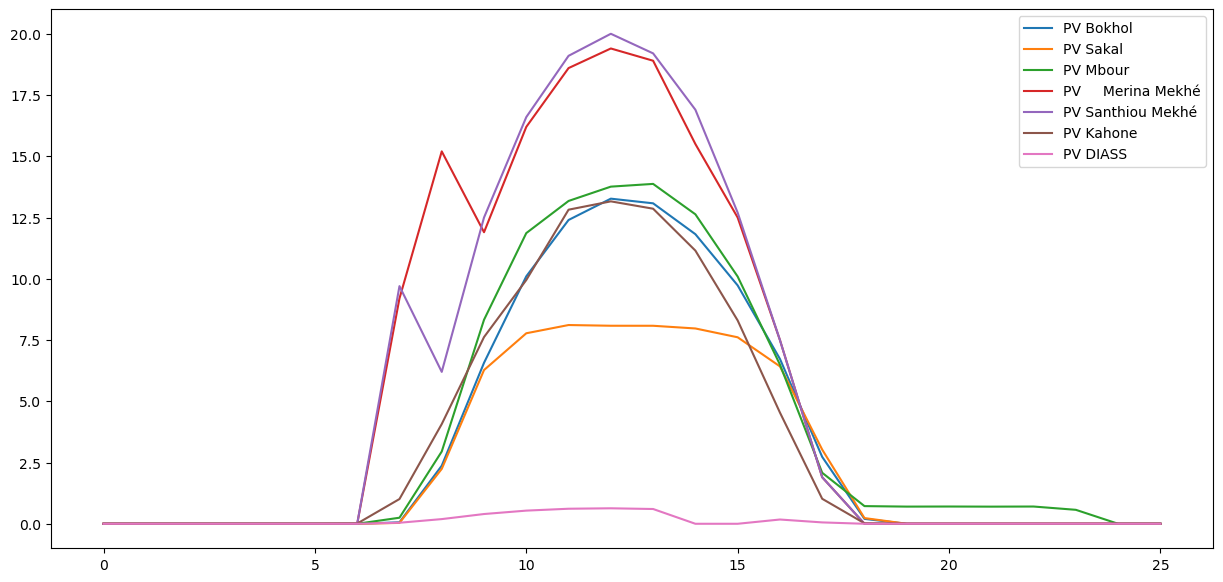

In [14]:
DemandePV = Demande[list(Demande.columns[18:])]
DemandePV.plot(figsize=(15,7))

<Axes: >

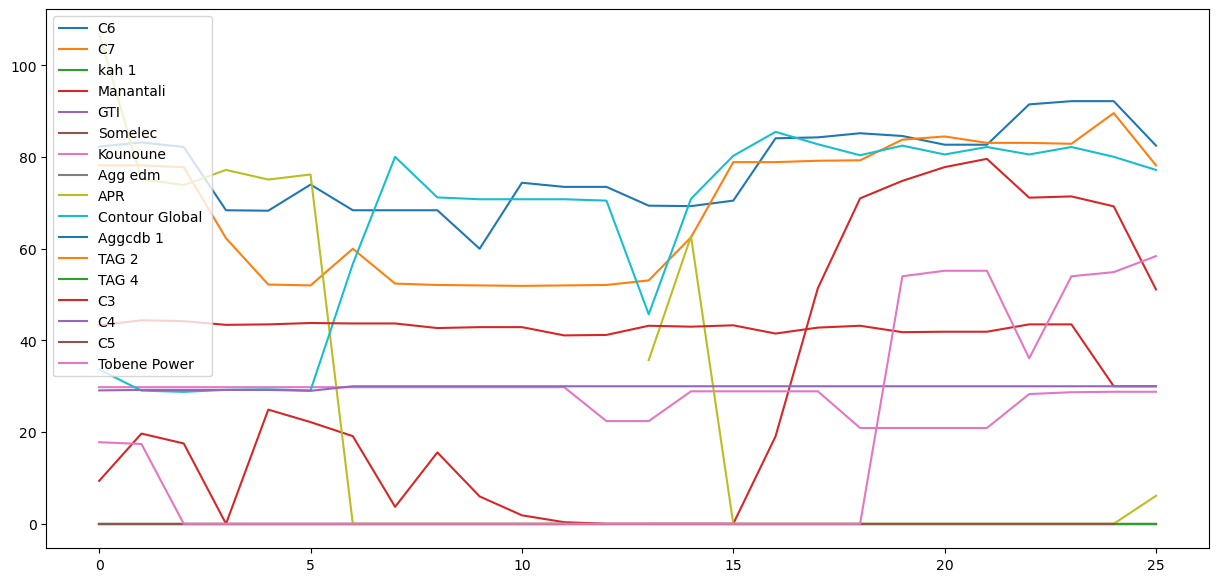

In [15]:
DemandeOIL = Demande[list(Demande.columns[:18])]
DemandeOIL.plot(figsize=(15,7))

### Extraction de la feuille 'P Inst'

In [16]:
# afficher du feuille centrales avec la suppression de l'entete
# , skiprows=2
Pinstaller = pd.read_excel(fichier_excel,skiprows=2,sheet_name='Centrales')
# suppression des variables non pertinante afin de rendre propre la feuille
Pinstaller=Pinstaller[:26].drop(['Unnamed: 26', 'Unnamed: 27','Total PV'],axis=1)
Pinstaller.head()

,Heure,C6,C7,kah 1,Manantali,GTI,Somelec,Kounoune,Agg edm,APR,...,C4,C5,Tobene Power,PV Bokhol,PV Sakal,PV Mbour,PV Merina Mekhé,PV Santhiou Mekhé,PV Kahone,PV DIASS
0,1 h,82.3,78.2,0,9.365707,0,0,29.8,0.0,106.9,...,29.1,0.0,17.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2 h,83.2,78.2,0,19.677563,0,0,29.8,0.0,75.2,...,29.2,0.0,17.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3 h,82.2,77.8,0,17.521857,0,0,29.8,0.0,73.9,...,29.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4 h,68.4,62.3,0,0.000000,0,0,29.8,0.0,77.2,...,29.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5 h,68.3,52.2,0,24.902888,0,0,29.8,0.0,75.1,...,29.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

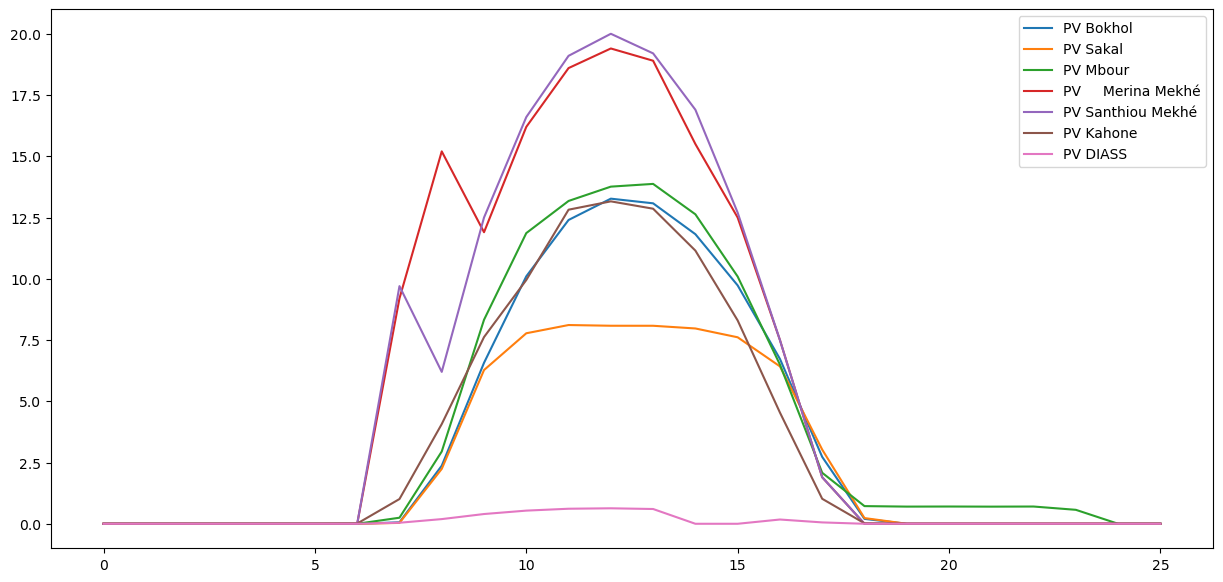

In [17]:
Pinstaller[list(Pinstaller.columns[18:])].plot(figsize=(15,7))

### Extraction de la feuille Energie

In [18]:
Energie = pd.read_excel(fichier_excel,sheet_name='Energie')
Energie.columns

Index([                 'Heures',                       106,
                             301,                       303,
                          'TAG2',                    'TAG4',
                             401,                       402,
                             403,                       404,
                             405,                     'Agg',
                        'Sendou',                    'Koun',
                            'TP',             'Unnamed: 15',
                            'CG',                    'Kah1',
                            'C7',                      'C6',
                      'PV-Mbour',                'PV-CICAD',
                     'PV Kahone',               'PV-Bokhol',
                          'Dang',                     'ICS',
               'PV Mékhé Mérina',     'PV S Mekhe Santhiou',
                   'Unnamed: 28',                'PV Sakal',
                            'RI', 'Manantali+Felou+Somelec',
                        

In [19]:
for i,j in enumerate(list(Energie.columns)):
    print(f"{i}: {j}")

0: Heures
1: 106
2: 301
3: 303
4: TAG2
5: TAG4
6: 401
7: 402
8: 403
9: 404
10: 405
11: Agg
12: Sendou
13: Koun
14: TP
15: Unnamed: 15
16: CG
17: Kah1
18: C7
19: C6
20: PV-Mbour
21: PV-CICAD
22: PV Kahone
23: PV-Bokhol
24: Dang
25: ICS
26: PV Mékhé Mérina
27: PV S Mekhe Santhiou
28: Unnamed: 28
29: PV Sakal
30: RI
31: Manantali+Felou+Somelec
32: RGI
33: RGI.1
34: RGI.2
35: RGI.3
36: RGI.4
37: Export Senelec


In [20]:
pv_sources = list(Energie.columns[20:24])+list(Energie.columns[26:28])+list(Energie.columns[29:30])

<Axes: >

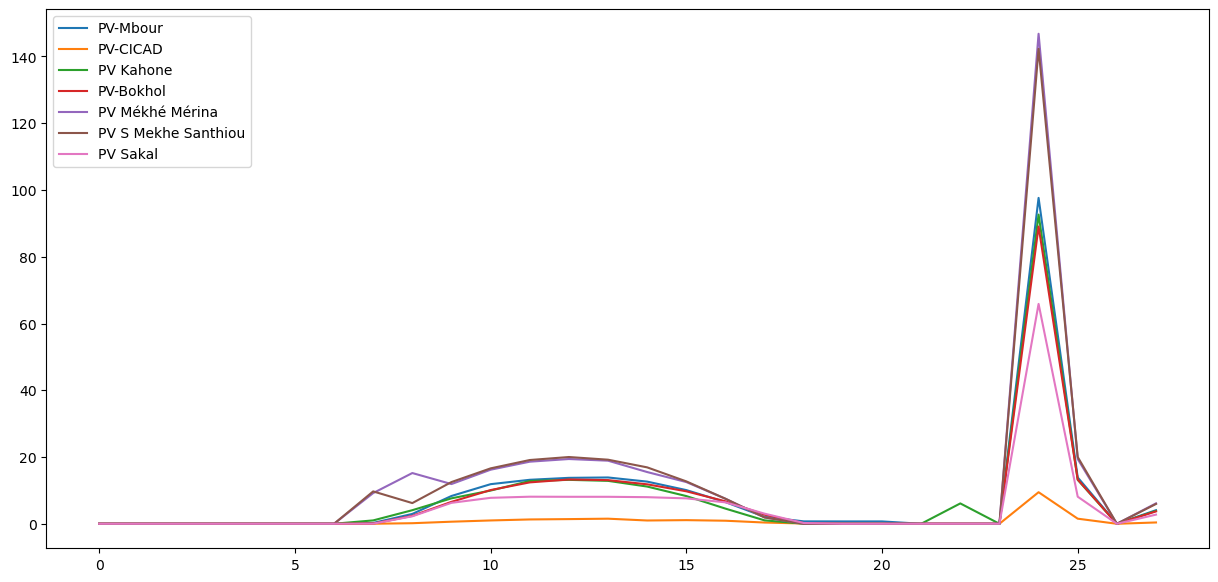

In [21]:
Energie[pv_sources].head(28).plot(figsize=(15,7))

### Extration de la feuille 'Pdispo'

In [22]:
Pdisponible = pd.read_excel(fichier_excel, skiprows=2,sheet_name='Pdispo')
Pdisponible = Pdisponible.head(27).dropna(axis=1)


In [23]:
Pdisponible

,Unnamed: 0,106,301,302,303,TG2,TG4,401,402,403,...,PV mekhé,PV Bokhol,PV Mbour,PV Kahone,PV Sakal,Unnamed: 42,Unnamed: 43,quota,Unnamed: 45,Unnamed: 46
0,01H00,0.0,22.0,0.0,22.0,18.0,25.0,0.0,15.0,0.0,...,0.0,0.00,0.000000,0.00,0.000,0.0,4.75,22.280263,636.930263,0.0
1,02H00,0.0,22.0,0.0,22.0,18.0,25.0,0.0,15.0,0.0,...,0.0,0.00,0.000000,0.00,0.000,0.0,4.75,22.280263,636.930263,0.0
2,03H00,0.0,22.0,0.0,22.0,18.0,25.0,0.0,15.0,0.0,...,0.0,0.00,0.000000,0.00,0.000,0.0,4.75,22.280263,636.930263,0.0
3,04H00,0.0,22.0,0.0,22.0,18.0,25.0,0.0,15.0,0.0,...,0.0,0.00,0.000000,0.00,0.000,0.0,4.75,22.280263,636.930263,0.0
4,05H00,0.0,22.0,0.0,22.0,18.0,25.0,0.0,15.0,0.0,...,0.0,0.00,0.000000,0.00,0.000,0.0,4.75,22.280263,636.930263,0.0
5,06H00,0.0,22.0,0.0,22.0,18.0,25.0,0.0,15.0,0.0,...,0.0,0.00,0.000000,0.00,0.000,0.0,4.75,22.280263,628.930263,0.0
6,07H00,0.0,22.0,0.0,22.0,18.0,25.0,0.0,15.0,0.0,...,0.0,0.00,0.000000,0.01,0.000,0.0,4.75,22.280263,513.940263,0.0
7,08H00,0.0,22.0,0.0,22.0,18.0,25.0,0.0,15.0,0.0,...,18.9,0.06,0.247160,1.01,0.036,0.0,4.75,22.280263,542.225423,0.0
8,09H00,0.0,22.0,0.0,22.0,18.0,25.0,0.0,15.0,0.0,...,21.4,2.37,2.949692,4.07,2.240,0.0,4.75,22.280263,555.150955,0.0
9,10H00,0.0,22.0,0.0,22.0,18.0,25.0,0.0,15.0,0.0,...,24.4,6.57,8.326346,7.62,6.275,0.0,4.75,22.280263,575.519609,0.0


### Rapport des delestages

In [24]:
Delestages = pd.read_excel(fichier_excel, skiprows=2,sheet_name='Délestage')
Delestages = Delestages.drop(Delestages.columns[-3:],axis=1)
Delestages.head()

,Heure,P.dispo (MW),Demande (MW),Délest par Manque Product,P. Effacée (MW),Autres P. coupée (MW),Déficit total (MW)
0,1 h,636.930263,430.407707,0,0.0,0,0
1,2 h,636.930263,406.129563,0,0.0,0,0
2,3 h,636.930263,372.603857,0,0.0,0,0
3,4 h,636.930263,356.614,0,0.0,3.3,3.3
4,5 h,636.930263,352.424888,0,0.0,0,0


<Axes: >

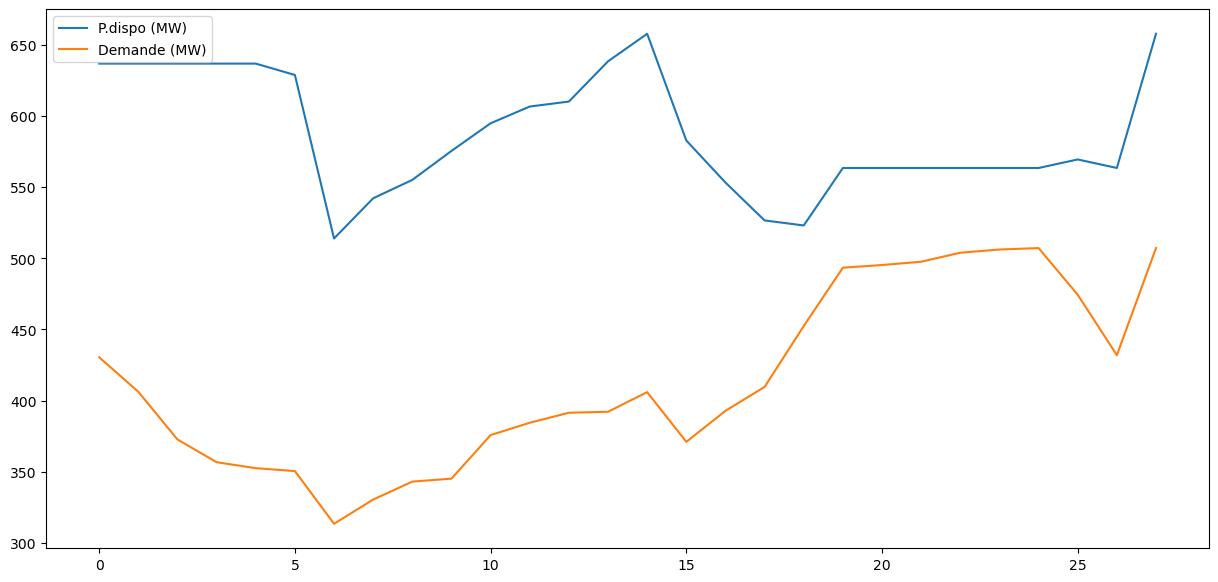

In [25]:
Production_demande = Delestages[Delestages.columns[1:3]].dropna(axis=0)
Production_demande.head(28).plot(figsize=(15,7))

In [26]:
Rapport = pd.read_excel(fichier_excel,skiprows=2 ,sheet_name='Rapport')
Rapport.head()

,1- ÉTAT DU PARC DE PRODUCTION,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229
0,Dpt,Centrales,Groupes,P. bugt (MW),P. dispo (MW),NaN,NaN,NaN,Heure,Puis. Dispo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vapeur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 h,636.930263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,C3,301,25,22,NaN,NaN,NaN,2 h,636.930263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,302,13,0,NaN,NaN,NaN,NaN,636.930263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,303,25,22,NaN,NaN,NaN,3h,636.930263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
from openpyxl import load_workbook

classeur_delestages = load_workbook(fichier_excel)
feuille_delestages = classeur_delestages['Délestage']

for plage in feuille_delestages.merged_cells.ranges:
    print(f"Plage fusionnée : {plage}")
    # Accéder à la première cellule de la plage
    cellule_principale = feuille_delestages[plage.coord.split(":")[0]]
    print(f"Valeur : {cellule_principale.value}")

Plage fusionnée : A1:B2
Valeur : Senelec


In [28]:
classeur = donnees.copy()

### Chargement en boucle des donnees

In [39]:
import glob
chemin_fichiers = r"A:\Mes_Documents_de_these\DOCUMENTS_RECHERCHE\DOCUMENTS_DE_REPPORTS\Datasets_theses\Rapports2019\01janvier2019\*.xlsx"
Tout = []
for classeur in glob.glob(chemin_fichiers):
    for cellule in pd.read_excel(classeur,sheet_name=None).keys():
        if cellule == 'P Inst':
            Pinstall = pd.read_excel(classeur,skiprows=2,sheet_name=cellule,engine='openpyxl')
            Pinstall=Pinstall[:26].drop(['Unnamed: 26', 'Unnamed: 27',],axis=1)
            Tout.append(Pinstall)

Pinstaller_total =pd.concat(Tout,axis=0)

ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [51]:
dossier = r"A:\Mes_Documents_de_these\DOCUMENTS_RECHERCHE\DOCUMENTS_DE_REPPORTS\Datasets_theses\Rapports2019\01janvier2019"

#fichiers_disponibles = os.listdir(dossier)
# Lister tous les fichiers dans le dossier
fichiers_excel1 = [f for f in os.listdir(dossier) if f.endswith(".xlsx") and not f.startswith("~$")]
Tout = []
for classeur in fichiers_excel1:
    chemin_complet = os.path.join(dossier, classeur)
    for cellule in pd.read_excel(chemin_complet,sheet_name=None).keys():
        if cellule == 'P Inst':
            Pinstall = pd.read_excel(chemin_complet,skiprows=2,sheet_name=cellule,engine='openpyxl')
            #Pinstall=Pinstall[:26].drop(['Unnamed: 26', 'Unnamed: 27',],axis=1)
            Tout.append(Pinstall)

Pinstaller_total =pd.concat(Tout,axis=0)

# Afficher les fichiers trouvés
print(f"Fichiers Excel trouvés : {fichiers_excel1}")


Fichiers Excel trouvés : ['01012019Ma.xlsx', '02012019Me.xlsx', '03012019J.xlsx', '04012019V.xlsx', '05012019S.xlsx', '06012019D.xlsx', '07012019L.xlsx', '08012019Ma.xlsx', '09012019Me.xlsx', '10012019J.xlsx', '11012019V.xlsx', '12012019S.xlsx', '13012019D.xlsx', '14012019L.xlsx', '15012019Ma.xlsx', '16012019Me.xlsx', '17012019J.xlsx', '18012019V.xlsx', '19012019S.xlsx', '20012019D.xlsx', '21012019L.xlsx', '22012019Ma.xlsx', '23012019Me.xlsx', '24012019J.xlsx', '25012019V.xlsx', '26012019S.xlsx', '27012019D.xlsx', '28012019L.xlsx', '29012019Ma.xlsx', '30012019Me.xlsx', '31012019J.xlsx']


In [53]:
Pinstall.shape

(330, 121)

In [50]:
for classeur in fichiers_excel1:
    chemin_complet = os.path.join(dossier, classeur)
    for cellule in pd.read_excel(chemin_complet,sheet_name=None).keys():
        print(cellule)

Rapport
Centrales
Demande
Délestage
P Inst
Energie
Pdel
Pdispo
Clients HT
liens
Reseau
Feuil1
Rapport
Centrales
Demande
Délestage
P Inst
Energie
Pdel
Pdispo
Clients HT
liens
Reseau
Feuil1
Rapport
Centrales
Demande
Délestage
P Inst
Energie
Pdel
Pdispo
Clients HT
liens
Reseau
Feuil1
Rapport
Centrales
Demande
Délestage
P Inst
Energie
Pdel
Pdispo
Clients HT
liens
Feuil2
Reseau
Feuil1
Rapport
Centrales
Demande
Délestage
P Inst
Energie
Pdel
Pdispo
Clients HT
liens
Feuil2
Reseau
Feuil1
Rapport
Centrales
Demande
Délestage
P Inst
Energie
Pdel
Pdispo
Clients HT
liens
Feuil2
Reseau
Feuil1
Rapport
Centrales
Demande
Délestage
P Inst
Energie
Pdel
Pdispo
Clients HT
liens
Feuil2
Reseau
Feuil1
Rapport
Centrales
Demande
Délestage
P Inst
Energie
Pdel
Pdispo
Clients HT
liens
Feuil2
Reseau
Feuil1
Rapport
Centrales
Demande
Délestage
P Inst
Energie
Pdel
Pdispo
Clients HT
liens
Feuil2
Reseau
Feuil1
Rapport
Centrales
Demande
Délestage
P Inst
Energie
Pdel
Pdispo
Clients HT
liens
Feuil2
Reseau
Feuil1
Rapport
Cen

In [46]:
dossier = r"A:\Mes_Documents_de_these\DOCUMENTS_RECHERCHE\DOCUMENTS_DE_REPPORTS\Datasets_theses\Rapports2019\01janvier2019"

#fichiers_disponibles = os.listdir(dossier)
# Lister tous les fichiers dans le dossier
fichiers_excel1 = [f for f in os.listdir(dossier) if f.endswith(".xlsx") and not f.startswith("~$")]
dataframes = []

for fichier in fichiers_excel1:
    chemin_complet = os.path.join(dossier, fichier)
    try:
        # Charger le fichier Excel
        df = pd.read_excel(chemin_complet, engine='openpyxl')  # Ajuster 'engine' si nécessaire
        df['Source'] = fichier  # Ajouter une colonne pour identifier la source
        dataframes.append(df)
        print(f"{fichier} chargé avec succès.")
    except Exception as e:
        print(f"Erreur lors du chargement de {fichier}: {e}")

# Fusionner tous les DataFrames si besoin
df_combine = pd.concat(dataframes, ignore_index=True)

# Aperçu du DataFrame combiné
print(df_combine.head())


01012019Ma.xlsx chargé avec succès.
02012019Me.xlsx chargé avec succès.
03012019J.xlsx chargé avec succès.
04012019V.xlsx chargé avec succès.
05012019S.xlsx chargé avec succès.
06012019D.xlsx chargé avec succès.
07012019L.xlsx chargé avec succès.
08012019Ma.xlsx chargé avec succès.
09012019Me.xlsx chargé avec succès.
10012019J.xlsx chargé avec succès.
11012019V.xlsx chargé avec succès.
12012019S.xlsx chargé avec succès.
13012019D.xlsx chargé avec succès.
14012019L.xlsx chargé avec succès.
15012019Ma.xlsx chargé avec succès.
16012019Me.xlsx chargé avec succès.
17012019J.xlsx chargé avec succès.
18012019V.xlsx chargé avec succès.
19012019S.xlsx chargé avec succès.
20012019D.xlsx chargé avec succès.
21012019L.xlsx chargé avec succès.
22012019Ma.xlsx chargé avec succès.
23012019Me.xlsx chargé avec succès.
24012019J.xlsx chargé avec succès.
25012019V.xlsx chargé avec succès.
26012019S.xlsx chargé avec succès.
27012019D.xlsx chargé avec succès.
28012019L.xlsx chargé avec succès.
29012019Ma.x

In [49]:
for fichier in fichiers_excel1:
    chemin_complet = os.path.join(dossier, fichier)
    print(chemin_complet)

A:\Mes_Documents_de_these\DOCUMENTS_RECHERCHE\DOCUMENTS_DE_REPPORTS\Datasets_theses\Rapports2019\01janvier2019\01012019Ma.xlsx
A:\Mes_Documents_de_these\DOCUMENTS_RECHERCHE\DOCUMENTS_DE_REPPORTS\Datasets_theses\Rapports2019\01janvier2019\02012019Me.xlsx
A:\Mes_Documents_de_these\DOCUMENTS_RECHERCHE\DOCUMENTS_DE_REPPORTS\Datasets_theses\Rapports2019\01janvier2019\03012019J.xlsx
A:\Mes_Documents_de_these\DOCUMENTS_RECHERCHE\DOCUMENTS_DE_REPPORTS\Datasets_theses\Rapports2019\01janvier2019\04012019V.xlsx
A:\Mes_Documents_de_these\DOCUMENTS_RECHERCHE\DOCUMENTS_DE_REPPORTS\Datasets_theses\Rapports2019\01janvier2019\05012019S.xlsx
A:\Mes_Documents_de_these\DOCUMENTS_RECHERCHE\DOCUMENTS_DE_REPPORTS\Datasets_theses\Rapports2019\01janvier2019\06012019D.xlsx
A:\Mes_Documents_de_these\DOCUMENTS_RECHERCHE\DOCUMENTS_DE_REPPORTS\Datasets_theses\Rapports2019\01janvier2019\07012019L.xlsx
A:\Mes_Documents_de_these\DOCUMENTS_RECHERCHE\DOCUMENTS_DE_REPPORTS\Datasets_theses\Rapports2019\01janvier2019\08012